# Introduction to Motion Energy Models: Exercises

## Overview

In this exercise notebook, you'll apply the key concepts from the introduction to motion energy models. These exercises will help you develop intuition for how motion is represented in space-time and understand the foundational concepts that we'll build upon throughout the course.

### Learning Objectives
By completing these exercises, you will be able to:
- Visualize and analyze motion patterns in space-time
- Understand the components of a basic motion energy model
- Explore how different parameters affect motion representation
- Connect theoretical concepts to practical implementations

## Setup

Let's import the libraries we'll need for these exercises.

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np

# Add the utils package to the path
sys.path.append("../../..")
try:
    from motionenergy.utils import stimuli_generation, visualization
except ImportError:
    print(
        "Note: utils modules not found. This is expected if you haven't implemented them yet."
    )

# For interactive plots
%matplotlib inline

# Set plotting style
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12

## Exercise 1: Analyzing Motion in Space-Time

One of the key insights from the introduction is that motion can be represented as oriented patterns in space-time. In this exercise, you'll explore this concept by analyzing and creating space-time representations of motion.

### 1.1 Understanding Space-Time Plots

Here's a space-time plot of a simple moving bar:

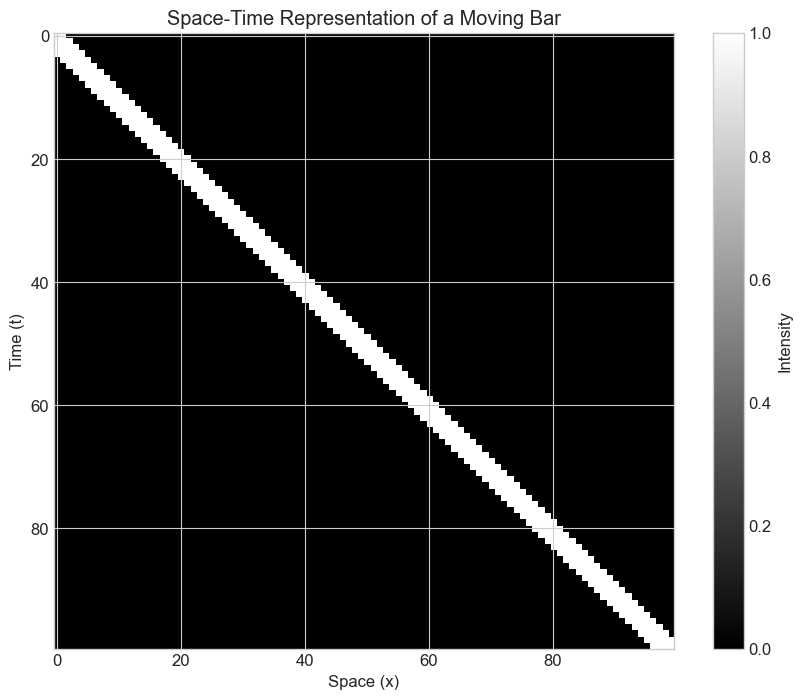

In [2]:
# Create a space-time plot of a moving bar
width = 100
frames = 100
bar_width = 5
speed = 1

# Create an empty space-time array
spacetime = np.zeros((frames, width))

# Add a moving bar
for t in range(frames):
    pos = (t * speed) % width
    bar_start = int(max(0, pos - bar_width / 2))
    bar_end = int(min(width, pos + bar_width / 2))
    spacetime[t, bar_start:bar_end] = 1

# Plot the space-time diagram
plt.figure(figsize=(10, 8))
plt.imshow(spacetime, cmap="gray", aspect="auto", origin="upper")
plt.title("Space-Time Representation of a Moving Bar")
plt.xlabel("Space (x)")
plt.ylabel("Time (t)")
plt.colorbar(label="Intensity")
plt.show()

**Questions:**

1. What does the orientation of the bar in the space-time plot tell you about the direction of motion?
2. How would the plot change if the bar moved in the opposite direction?
3. What would happen to the slope of the line if the bar moved faster? Slower?

**Your answers here:**
1. 
2. 
3.

**Your answers here:**
1. The space-time plot clearly shows movement in space across time. Since the slope is fixed, this indicates a constant speed at which the bar is moving through space in the positive x-direction. 
2. If the bar moved in the opposite direction, we'd see the bar start at (90, 0) and move towards (0, 80). The slope would be negative, but when depicted in this chart it would be a y=x line.
3. If the bar moved at a constant speed, but faster we'd see a steeper slope as it moved through space faster. If slower, we'd see it move with a flatter gradient. 

### 1.2 Creating Space-Time Representations

Now, let's create space-time representations for different types of motion. First, you'll need to implement a function to create a moving bar with variable speed and direction.

In [3]:
def create_moving_bar_stimulus(
    width: int, height: int, frames: int, speed: float, direction="right"
):
    """
    Create a stimulus with a bar moving at the specified speed and direction.
    The bar width should be approximately 10% of the frame dimension it's moving along.
    The bar should move in the specified direction at the given speed.
    For horizontal motion (right/left), the bar should span the full height.
    For vertical motion (up/down), the bar should span the full width.

    Parameters:
    -----------
    width : int
        Width of the stimulus frame
    height : int
        Height of the stimulus frame
    frames : int
        Number of frames in the sequence
    speed : float
        Speed of the bar in pixels per frame
    direction : str
        Direction of motion ('right', 'left', 'up', or 'down')

    Returns:
    --------
    stimulus : ndarray
        3D array with dimensions (frames, height, width)
    """
    # Initialize the stimulus array
    stimulus = np.zeros((frames, height, width))
    if direction in ("right", "left"):
        bar_size = max(1, width // 10)  # bar is at least 1 pixel
        max_dim = width
        speed = speed if direction == "right" else -speed
    if direction in ("up", "down"):
        bar_size = max(1, height // 10)  # bar is at least 1 pixel
        max_dim = height
        speed = speed if direction == "down" else -speed

    for t in range(frames):
        pos_float = t * speed
        start_idx = int(pos_float + 0.5)  # Add 0.5 to round to the nearest integer
        indices = np.arange(start_idx, start_idx + bar_size, 1)
        wrapped_indices = indices % max_dim

        if direction in ("right", "left"):
            stimulus[t, :, wrapped_indices] = 1
        else:
            stimulus[t, wrapped_indices, :] = 1

    return stimulus

Now, let's create a function to visualize the space-time representation of a stimulus:

In [4]:
def spacetime_slice(stimulus: np.ndarray, slice_type="horizontal", slice_position=None):
    """
    Returns a slice across time in one dimension of space (either horizontal or vertical)

    :param stimulus: 3D array with dimensions (frames, height, width)
    :param slice_type: Type of slice to extract ('horizontal' or 'vertical')
    :param slice_position: Position at which to extract the slice (default: middle of frame)
    :return: a 2D slice of the stimulus across time, selected for one of the height / width dimension
    """

    frames, height, width = stimulus.shape

    # Set default slice position if not provided
    if slice_position is None:
        if slice_type == "horizontal":
            slice_position = height // 2
        else:  # vertical
            slice_position = width // 2

    # Create a place-holder spacetime_slice (you should replace this in your implementation)
    if slice_type == "horizontal":
        spacetime_slice = stimulus[:, slice_position, :]
    else:  # vertical
        spacetime_slice = stimulus[:, :, slice_position]
    return spacetime_slice


def visualize_spacetime(stimulus, slice_type="horizontal", slice_position=None):
    """
    Visualize a stimulus in the space-time domain.

    Returns:
    --------
    fig : matplotlib figure
        Figure with the space-time visualization
    """
    slice = spacetime_slice(stimulus, slice_type, slice_position)
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(slice, cmap="gray", aspect="auto", origin="upper")

    if slice_type == "horizontal":
        ax.set_title(f"Horizontal Space-Time Slice (y={slice_position})")
        ax.set_xlabel("Space (x)")
    else:  # vertical
        ax.set_title(f"Vertical Space-Time Slice (x={slice_position})")
        ax.set_xlabel("Space (y)")

    ax.set_ylabel("Time (t)")
    plt.colorbar(im, ax=ax, label="Intensity")

    return fig

Now, use your functions to create and visualize stimuli with different motion patterns:

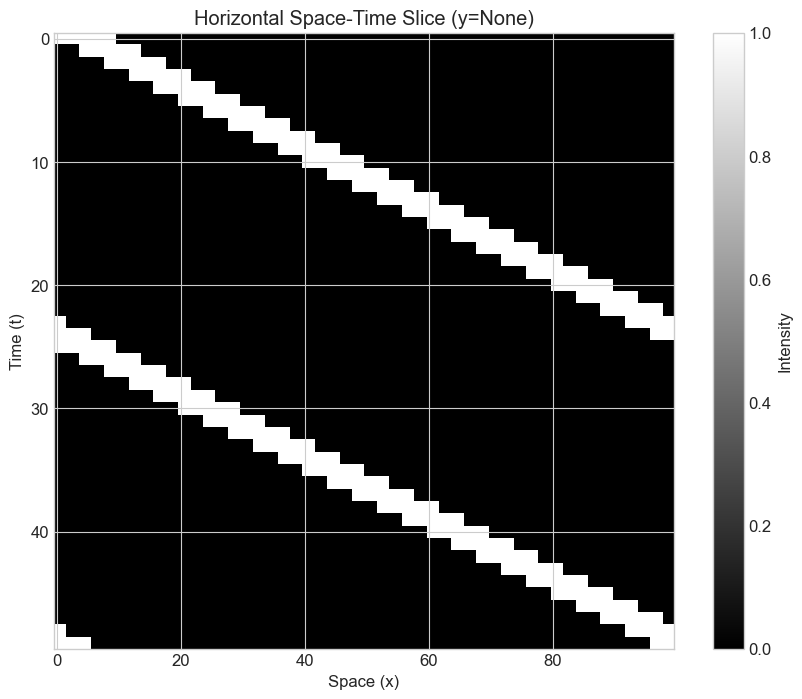

In [5]:
# Create and visualize a rightward moving bar
width, height = 100, 100
frames = 50
speed = 4

# Create a stimulus using your create_moving_bar_stimulus function
# with direction='right'
stimulus = create_moving_bar_stimulus(width, height, frames, speed, "right")
fig = visualize_spacetime(stimulus)

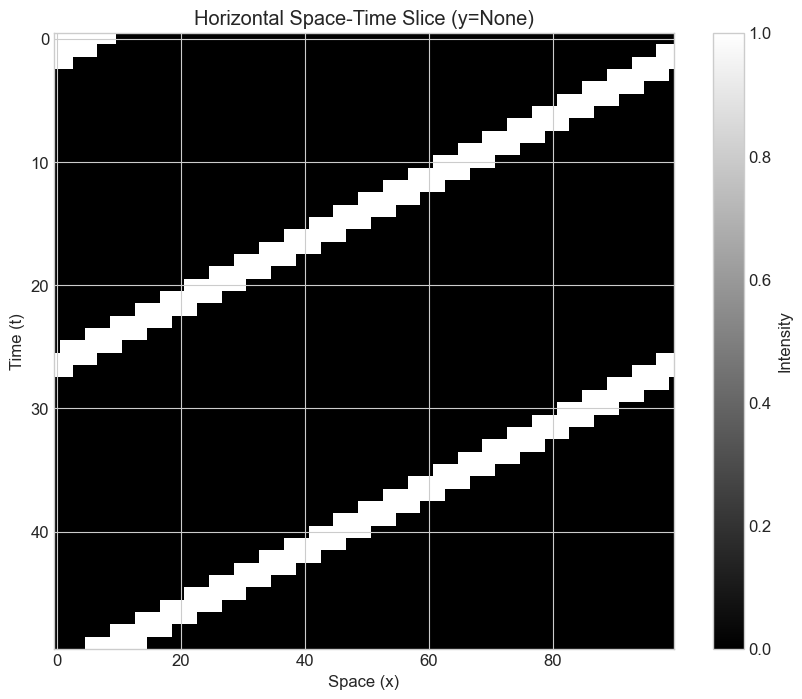

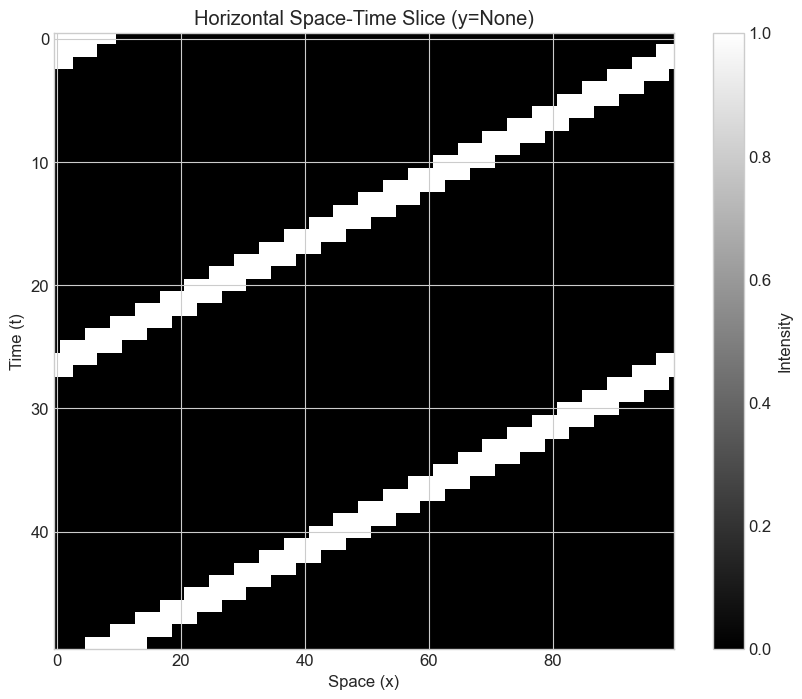

In [6]:
# Create a stimulus with direction='left'
# Visualize the space-time representation
stimulus = create_moving_bar_stimulus(width, height, frames, speed, "left")
visualize_spacetime(stimulus)

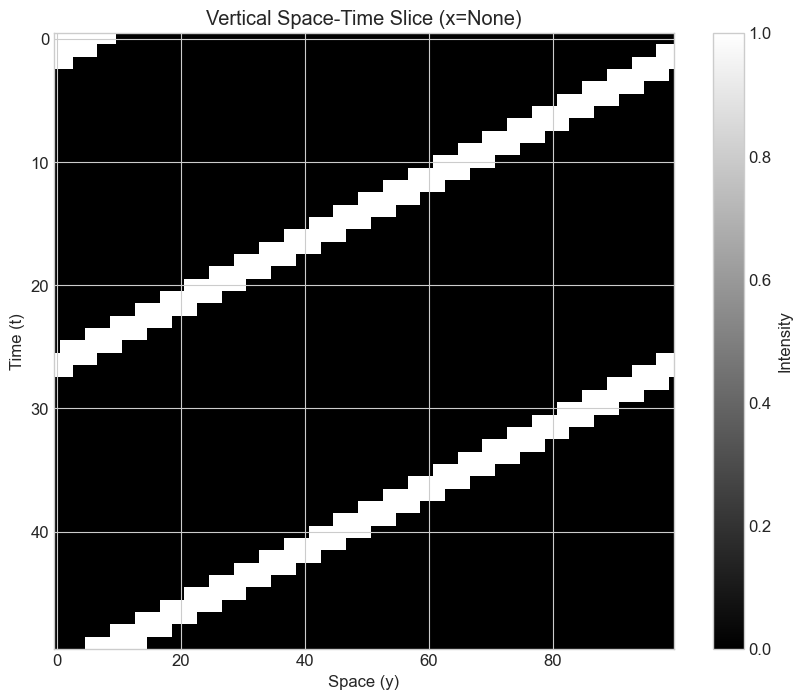

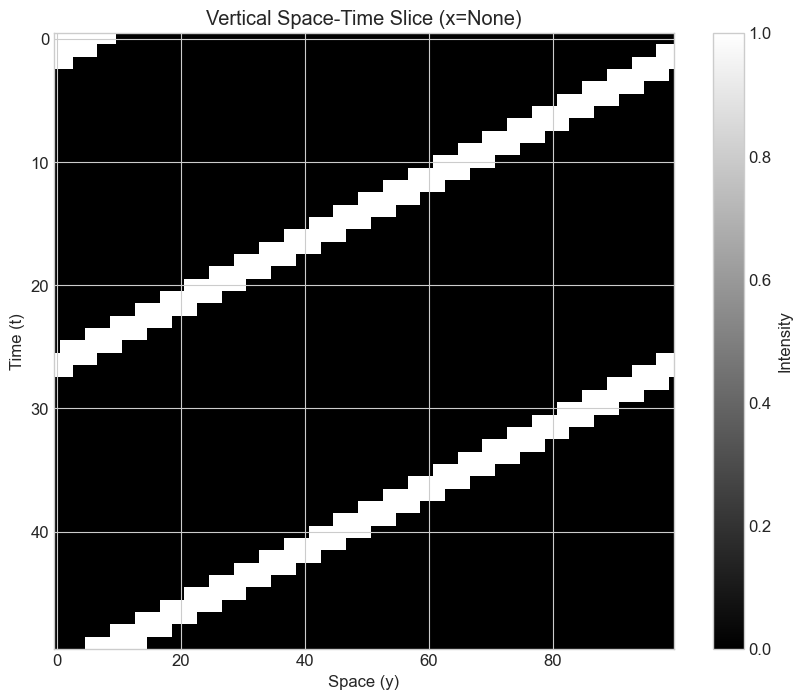

In [7]:
# Create a stimulus with direction='up'
# Visualize the space-time representation with slice_type='vertical'
stimulus = create_moving_bar_stimulus(width, height, frames, speed, "up")
visualize_spacetime(stimulus, slice_type="vertical")

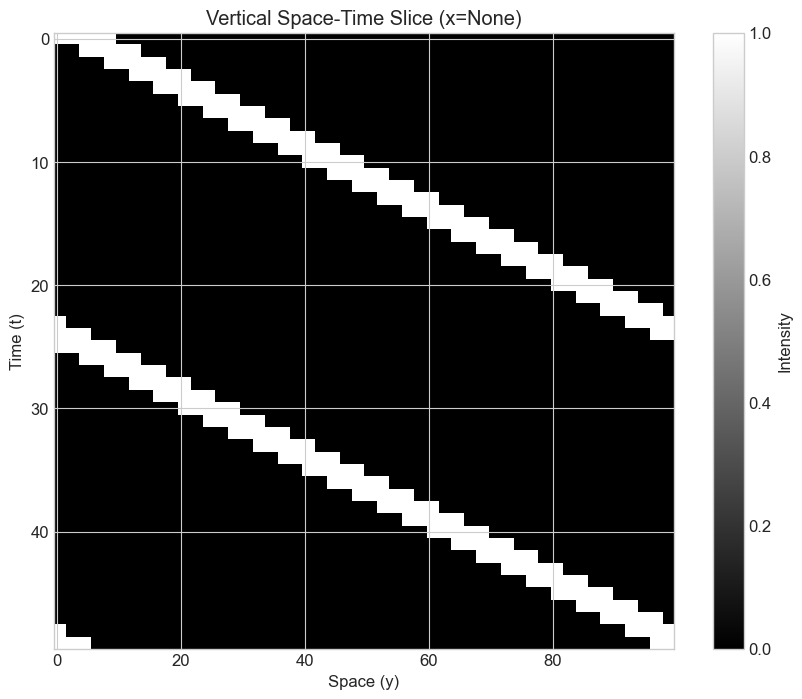

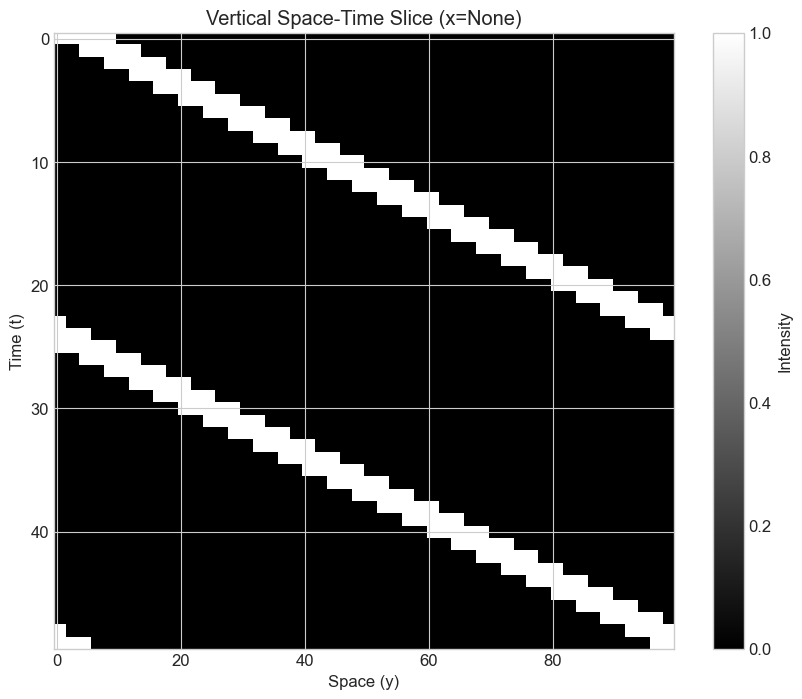

In [8]:
# Create a stimulus with direction='down'
# Visualize the space-time representation with slice_type='vertical'
stimulus = create_moving_bar_stimulus(width, height, frames, 4, "down")
visualize_spacetime(stimulus, slice_type="vertical")

### 1.3 Quantifying Motion from Space-Time

Now, let's implement a function to estimate the direction and speed of motion from a space-time representation. One approach is to measure the orientation of the pattern in the space-time domain.

In [9]:
from numpy.polynomial import Polynomial
from skimage.measure import label


# TODO: Implement the Hough Transform
# TODO: Integrate this with the motion velocity and direction estimation function.
def compute_velocity_linefit(
    st_slice: np.ndarray,
    intensity_threshold: float = 0.1,
    point_count_thresh: float = 0.20,
):
    """
    Computes velocity from a space-time slice using line fitting method.

    This approach fits a line to the non-zero points in the space-time slice,
    which represents the bar's position over time. The slope of this line is
    1/velocity, so the velocity is computed as the inverse of the slope.

    Parameters:
    -----------
    st_slice : ndarray
        2D array representing the space-time slice (expected shape: time, space)
    threshold : float
        Intensity threshold to identify the stimulus region

    Returns:
    --------
    line_velocity : float
        Velocity estimated from line fitting
    """
    # Create a binary mask where the bar is present
    binary_mask = st_slice > intensity_threshold
    labeled = label(binary_mask)
    num_labels = labeled.max()
    components = {}

    # Compute a 1st degree polynomial fit to the connected components
    for label_id in range(1, num_labels + 1):
        y_indices, x_indices = np.where(labeled == label_id)
        if len(y_indices) == 0:
            continue

        poly = Polynomial.fit(x_indices, y_indices, deg=1)
        converted = poly.convert()
        slope, intercept = converted.coef[1], converted.coef[0]
        velocity = 1.0 / slope if not np.isclose(slope, 0, atol=1e-6) else np.inf
        components[label_id] = {
            "x_indices": x_indices,
            "y_indices": y_indices,
            "coef": [slope, intercept],
            "velocity": velocity,
        }

    if len(components) == 0:
        return np.nan

    components = filter_nosiy_components(components, point_count_thresh)
    velocities = list(
        {label_id: data["velocity"] for label_id, data in components.items()}.values()
    )
    mean_velocity = np.nanmean(velocities)
    return mean_velocity


def filter_nosiy_components(
    components: dict[str, dict], point_count_thresh: int
) -> dict:
    if len(components) == 0:
        return components
    filtered_components = {}
    points_per_component = {
        label_id: len(data["x_indices"]) for label_id, data in components.items()
    }
    max_points = max(points_per_component.values())
    min_points_required = max_points * point_count_thresh
    for label_id in components.keys():
        data = components[label_id]
        num_points = len(data["x_indices"])
        if num_points >= min_points_required:
            filtered_components[label_id] = data

    return filtered_components


def plot_fit_lines(stimulus: np.ndarray, components: dict):
    # Plot the points and the fit for each component
    _, ax = plt.subplots()
    for label_id, fit in components.items():
        x_indices, y_indices, coef, velocity = (
            fit["x_indices"],
            fit["y_indices"],
            fit["coef"],
            fit["velocity"],
        )
        slope, intercept = coef[0], coef[1]
        x_range = np.array([0, stimulus.shape[1] - 1])  # Just use the endpoints
        y_range = slope * x_range + intercept  # Compute the y-values for the endpoints
        ax.imshow(stimulus, aspect="auto", cmap="gray", origin="upper")
        ax.scatter(
            x_indices, y_indices, s=3, alpha=0.3, label=f"Label {label_id} Points"
        )
        ax.plot(
            x_range,
            y_range,
            linewidth=2,
            label=f"Label {label_id} (slope={slope:.4f}, vel={velocity:.2f})",
        )

    ax.set_title("Multiple Line Fitting in a Single Plot")
    ax.set_xlabel("Space (x)")
    ax.set_ylabel("Time (t)")
    ax.legend(frameon=True, facecolor="white")
    plt.tight_layout()
    plt.show()


# Test with a stimulus with a bar moving rightward at speed 4
stimulus = create_moving_bar_stimulus(width, height, frames, speed=1, direction="left")
horizontal = spacetime_slice(stimulus, slice_type="horizontal")
vertical = spacetime_slice(stimulus, slice_type="vertical")
line_velocity = compute_velocity_linefit(horizontal)
line_velocity = compute_velocity_linefit(vertical)

In [10]:
def estimate_motion_from_spacetime(stimulus_spacetime: np.ndarray):
    """
    Estimate the direction and speed of motion from a moving bar stimulus.

    Parameters:
    -----------
    spacetime_slice : ndarray
        3D array representing a moving bar stimulus through space-time

    Returns:
    --------
    direction : str
        Estimated direction of motion ('right', 'left', 'up', 'down', or 'unknown')
    speed : float
        Estimated speed in pixels per frame
    """

    # First get two slices from the stimulus (horizontal and vertical)
    #
    # For each slice, do the following:
    # Compute the 2D gradients of each - stimulus intensity across time, and across space
    # Compute the stimulus velocity via dx / dt at each point
    # Compute the mean
    #

    horizontal = spacetime_slice(stimulus, slice_type="horizontal")
    vertical = spacetime_slice(stimulus, slice_type="vertical")

    horizontal_velocity = compute_velocity_linefit(horizontal)
    vertical_velocity = compute_velocity_linefit(vertical)

    if horizontal_velocity not in (np.nan, np.inf):
        direction = "left" if horizontal_velocity < 0 else "right"
        speed = np.abs(horizontal_velocity)
    elif vertical_velocity not in (np.nan, np.inf):
        direction = "up" if vertical_velocity < 0 else "down"
        speed = np.abs(vertical_velocity)
    else:
        direction = "unknown"
        speed = 0.0

    return direction, speed


stimulus = create_moving_bar_stimulus(width, height, frames, speed=1, direction="left")
direction, speed = estimate_motion_from_spacetime(stimulus)
print(direction, speed)

left 1.0260575670551078


In [11]:
tests = [
    ("left", 1.0),
    ("left", 4.0),
    ("right", 2.0),
    ("right", 10.0),
    ("up", 5.0),
    ("down", 3.0),
]
width, height, frames = 100, 100, 50
for [actual_direction, actual_speed] in tests:
    stimulus = create_moving_bar_stimulus(
        width, height, frames, actual_speed, actual_direction
    )
    estimated_direction, estimated_speed = estimate_motion_from_spacetime(stimulus)
    print(
        f"Actual Direction, Estimated Direction: {actual_direction}, {estimated_direction}"
    )
    print(f"Actual Speed, Estimated Speed: {actual_speed}, {estimated_speed}")


Actual Direction, Estimated Direction: left, left
Actual Speed, Estimated Speed: 1.0, 1.0260575670551078
Actual Direction, Estimated Direction: left, left
Actual Speed, Estimated Speed: 4.0, 4.0111256520036935
Actual Direction, Estimated Direction: right, right
Actual Speed, Estimated Speed: 2.0, 2.0110634429199163
Actual Direction, Estimated Direction: right, right
Actual Speed, Estimated Speed: 10.0, 10.1
Actual Direction, Estimated Direction: up, up
Actual Speed, Estimated Speed: 5.0, 5.048378603339612
Actual Direction, Estimated Direction: down, down
Actual Speed, Estimated Speed: 3.0, 3.034606071475132


Try your motion estimation function on the space-time slices you created:

## Exercise 2: Components of Motion Energy Models

Motion energy models consist of several key components that work together to detect motion. In this exercise, you'll explore these components and how they relate to each other.

### 2.1 Motion Energy Model Components

Below is a high-level diagram of a motion energy model:

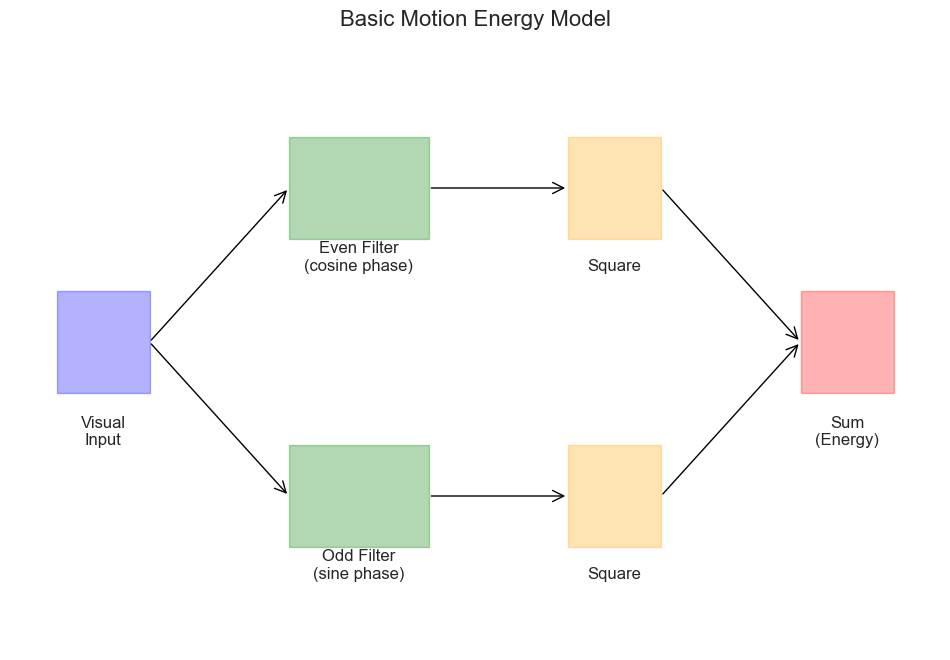

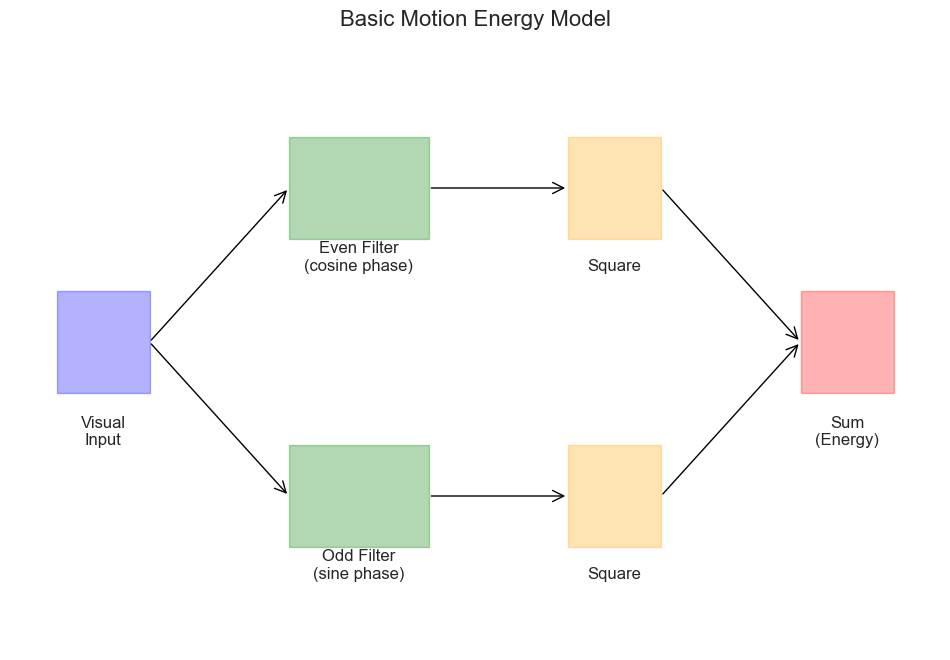

In [12]:
from matplotlib.patches import FancyArrowPatch, Rectangle


def draw_model_diagram():
    fig, ax = plt.subplots(figsize=(12, 8))

    # Set up the axes
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    ax.axis("off")

    # Draw the input
    ax.add_patch(Rectangle((0.5, 2.5), 1, 1, fill=True, alpha=0.3, color="blue"))
    ax.text(1, 2, "Visual\nInput", ha="center")

    # Draw the filters
    ax.add_patch(Rectangle((3, 4), 1.5, 1, fill=True, alpha=0.3, color="green"))
    ax.text(3.75, 3.7, "Even Filter\n(cosine phase)", ha="center")

    ax.add_patch(Rectangle((3, 1), 1.5, 1, fill=True, alpha=0.3, color="green"))
    ax.text(3.75, 0.7, "Odd Filter\n(sine phase)", ha="center")

    # Draw the squared outputs
    ax.add_patch(Rectangle((6, 4), 1, 1, fill=True, alpha=0.3, color="orange"))
    ax.text(6.5, 3.7, "Square", ha="center")

    ax.add_patch(Rectangle((6, 1), 1, 1, fill=True, alpha=0.3, color="orange"))
    ax.text(6.5, 0.7, "Square", ha="center")

    # Draw the sum
    ax.add_patch(Rectangle((8.5, 2.5), 1, 1, fill=True, alpha=0.3, color="red"))
    ax.text(9, 2, "Sum\n(Energy)", ha="center")

    # Draw the arrows
    ax.add_patch(
        FancyArrowPatch(
            (1.5, 3), (3, 4.5), arrowstyle="->", mutation_scale=20, color="black"
        )
    )
    ax.add_patch(
        FancyArrowPatch(
            (1.5, 3), (3, 1.5), arrowstyle="->", mutation_scale=20, color="black"
        )
    )

    ax.add_patch(
        FancyArrowPatch(
            (4.5, 4.5), (6, 4.5), arrowstyle="->", mutation_scale=20, color="black"
        )
    )
    ax.add_patch(
        FancyArrowPatch(
            (4.5, 1.5), (6, 1.5), arrowstyle="->", mutation_scale=20, color="black"
        )
    )

    ax.add_patch(
        FancyArrowPatch(
            (7, 4.5), (8.5, 3), arrowstyle="->", mutation_scale=20, color="black"
        )
    )
    ax.add_patch(
        FancyArrowPatch(
            (7, 1.5), (8.5, 3), arrowstyle="->", mutation_scale=20, color="black"
        )
    )

    ax.set_title("Basic Motion Energy Model", fontsize=16)

    return fig


draw_model_diagram()

**Questions:**

1. What is the purpose of having both even (cosine phase) and odd (sine phase) filters?
2. Why do we square the outputs of the filters?
3. What does the final summed output (energy) represent?
4. How would you modify this model to detect motion in the opposite direction?

**Your answers here:**
1. 
2. 
3. 
4. 

### 2.2 Simple Filter Responses

Let's implement a simplified version of the first stage of a motion energy model: applying spatiotemporal filters to a stimulus. We'll start with 1D space + time for simplicity.

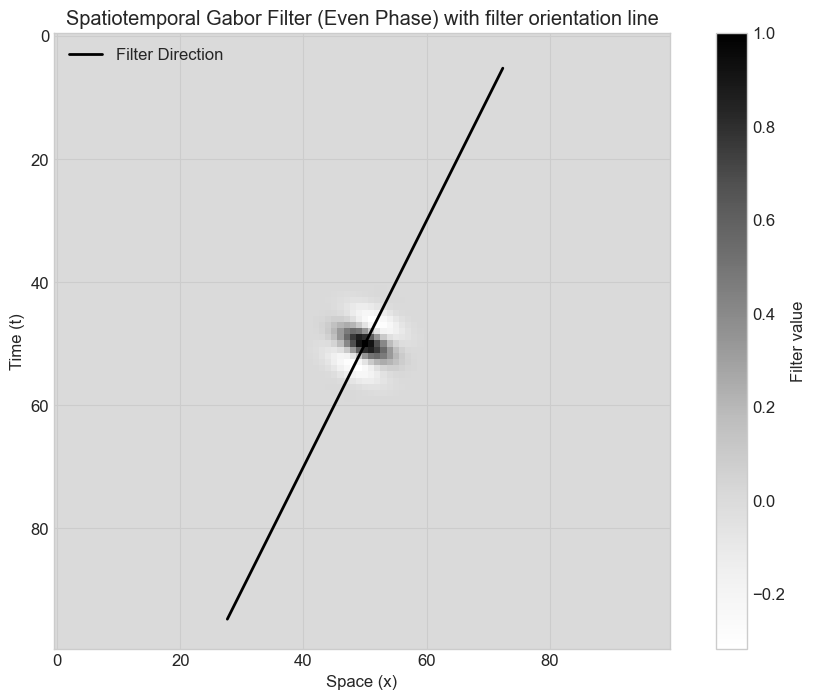

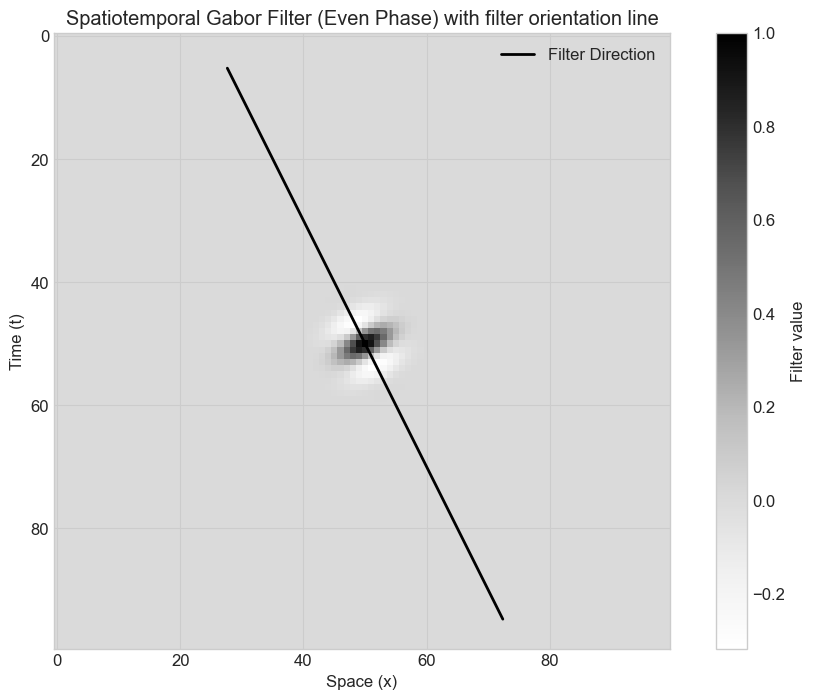

(array([[-5.98350703e-122, -2.91704298e-119, -9.06748463e-117, ...,
         -1.65887900e-114, -5.64156065e-117, -1.08425512e-119],
        [-4.14116105e-119, -1.23335791e-116, -2.97055130e-114, ...,
         -1.13821841e-112,  2.64172232e-115,  4.97142254e-117],
        [-1.21399642e-116, -3.00753646e-114, -6.14974102e-112, ...,
          4.67003203e-110,  4.00155658e-112,  2.42316635e-114],
        ...,
        [ 2.37003396e-114,  5.90235275e-112,  1.21357482e-109, ...,
         -8.71069251e-108, -7.64826481e-110, -4.68162372e-112],
        [ 1.15603886e-116,  2.42316635e-114,  4.00155658e-112, ...,
         -1.02508815e-109, -6.14974102e-112, -3.00753646e-114],
        [ 3.41098568e-119,  4.97142254e-117,  2.64172232e-115, ...,
         -5.89278595e-112, -2.97055130e-114, -1.23335791e-116]],
       shape=(100, 100)),
 array([[ 2.22583479e-121,  4.82681927e-119,  8.38308141e-117, ...,
         -1.76137315e-114, -1.09849044e-116, -5.53459256e-119],
        [ 3.82859102e-119,  6.190835

In [ ]:
def create_1d_spatiotemporal_filters(
    space_size: int,
    time_size: int,
    speed: float,
    direction: int = 1,
    sigma: float = 3.0,
    f: float = 1.0,
):
    """
    Create a pair of 1D+time spatiotemporal filters (even and odd phase).
    Note: the orientation of the filter is perpendicular to the motion trajectory angle as per convention in
    the standard Gabor filter formulation. We want the filter to oscilliate perpendicular to the 
    trajectory of the stimulus.

    So if m = 1/speed (since t is the y-axis we have m = dt / dx), then the perpendicular is m_p = -speed = -speed * direction

    To compute theta, we can use tan(theta) = p / b = -speed * direction. theta = -arctan(speed * direction)

    Parameters:
    -----------
    space_size : int
        Size of the spatial dimension
    time_size : int
        Size of the temporal dimension
    speed : float
        Speed of the filter's preferred motion
    direction : int
        Direction of the filter's preferred motion (1 for rightward, -1 for leftward)

    Returns:
    --------
    even_filter : ndarray
        2D array with dimensions (time_size, space_size) for the even phase filter
    odd_filter : ndarray
        2D array with dimensions (time_size, space_size) for the odd phase filter
    """
    # TODO: Implement the creation of a pair of 1D+time spatiotemporal filters.
    # These filters should be selective for motion at the specified speed and direction.
    # The even filter should have cosine phase, and the odd filter should have sine phase.
    #
    # TUTORIAL:
    # 1. Understand space-time orientation:
    #    - A motion-selective filter is oriented in space-time in the direction of motion
    #    - The slope of this orientation is determined by the speed
    #    - direction=1 means rightward motion (positive slope), direction=-1 means leftward (negative slope)
    #
    # 2. Creating a spatiotemporal Gabor filter:
    #    a) Create a 2D coordinate system (x, t) covering your space-time dimensions
    #    b) Create a rotated coordinate system (x', t') that's oriented along the motion trajectory
    #       x' = x*cos(θ) + t*sin(θ)  # Where θ depends on speed and direction
    #       t' = -x*sin(θ) + t*cos(θ)
    #    c) Create a Gabor filter using these rotated coordinates:
    #       even_filter = exp(-(x'^2 + t'^2)/(2*sigma^2)) * cos(2π*f*x')
    #       odd_filter = exp(-(x'^2 + t'^2)/(2*sigma^2)) * sin(2π*f*x')
    #    d) The spatial frequency f and Gaussian envelope sigma determine the filter's selectivity
    #
    # 3. Parameters to consider:
    #    - Spatial frequency (f): Higher values make the filter selective for higher spatial frequencies
    #    - Sigma: Controls the size of the Gaussian envelope
    #    - Orientation angle (θ): Determined by speed and direction, θ = arctan(direction * speed)

    # Your implementation here:


    space = np.arange(0, space_size, 1)
    time = np.arange(0, time_size, 1)

    X, T = np.meshgrid(space, time)

    theta = -np.arctan(speed * direction)

    filter_center_x = space_size // 2
    filter_center_t = time_size // 2

    X_centered = X - filter_center_x  # Shift X coordinates to be centered around 0
    T_centered = T - filter_center_t  # Shift T coordinates to be centered around 0

    X_rot = X_centered * np.cos(theta) + T_centered * np.sin(theta)
    T_rot = -X_centered * np.sin(theta) + T_centered * np.cos(theta)

    gaussian_envelope = np.exp(-(X_rot**2 + T_rot**2) / (2 * sigma**2))
    even_filter = gaussian_envelope * np.cos(2* np.pi * f * X_rot)
    odd_filter = gaussian_envelope * np.sin(2* np.pi * f * X_rot)

    # Plot the rotation that occurs
    fig, ax = plt.subplots(figsize=(12,8))
    # Create a line that passes through the filter center point with the right orientation
    line_length = max(space_size, time_size) // 2
    # Create a parameter that varies along the line
    t_param = np.linspace(-line_length, line_length, 100)
    
    # For a line with angle theta from horizontal, parametric equation is:
    # x = center_x + t * cos(theta)
    # y = center_y + t * sin(theta)
    filter_line_x = filter_center_x + t_param * np.cos(theta)
    filter_line_t = filter_center_t + t_param * np.sin(theta)

    # Plot the direction line on top of the filter
    plt.plot(filter_line_x, filter_line_t, color='black', linestyle='-', linewidth=2, label='Filter Direction')

    # Overlay the filter on the grid using contourf
    # extent = [0, space_size, time_size, 0]  # [left, right, bottom, top]
    # contour = ax.contourf(X, T, even_filter, levels=20, cmap='seismic', alpha=0.7, origin='upper')
    im = ax.imshow(even_filter, origin='upper')
    # plt.gca().invert_yaxis()  # This will make time flow downward while keeping the data orientation
    plt.colorbar(im, label='Filter value')

    plt.legend()
    plt.title('Spatiotemporal Gabor Filter (Even Phase) with filter orientation line')
    plt.xlabel('Space (x)')
    plt.ylabel('Time (t)')

    plt.show()


    return even_filter, odd_filter


create_1d_spatiotemporal_filters(
    100, 100, speed = 2, direction = 1, f=0.1
)
create_1d_spatiotemporal_filters(
    100, 100, speed = 2, direction = -1, f=0.1
)

In [109]:
import scipy

def apply_energy_model(stimulus: np.ndarray, even_filter, odd_filter):
    """
    Apply a motion energy model to a stimulus.

    Parameters:
    -----------
    stimulus : ndarray
        2D array with dimensions (time, space) representing the stimulus
    even_filter : ndarray
        2D array with dimensions (time, space) for the even phase filter
    odd_filter : ndarray
        2D array with dimensions (time, space) for the odd phase filter

    Returns:
    --------
    energy : float
        Motion energy response
    """
    # TODO: Implement the motion energy model:
    # 1. Apply the even filter to the stimulus using convolution
    # 2. Apply the odd filter to the stimulus using convolution
    # 3. Square both filter responses
    # 4. Sum the squared responses to get the motion energy


    even_convolved = scipy.signal.convolve2d(stimulus, even_filter)
    odd_convolved = scipy.signal.convolve2d(stimulus, odd_filter)

    energy = np.sum(even_convolved**2 + odd_convolved**2)

    # TUTORIAL:
    # The motion energy computation follows these steps:
    #
    # 1. Convolve the stimulus with each filter:
    #    - even_response = scipy.signal.convolve2d(stimulus, even_filter, mode='valid')
    #    - odd_response = scipy.signal.convolve2d(stimulus, odd_filter, mode='valid')
    #    - The 'valid' mode means only return output where filters and input fully overlap
    #
    # 2. Square the responses:
    #    - even_response_squared = even_response ** 2
    #    - odd_response_squared = odd_response ** 2
    #
    # 3. Sum the squared responses:
    #    - energy = np.sum(even_response_squared + odd_response_squared)
    #      or for a more detailed output:
    #    - energy_map = even_response_squared + odd_response_squared
    #
    # 4. IMPORTANT: The squaring and summing steps make the energy model phase-invariant,
    #    which means it responds similarly regardless of the exact position of features
    #    within the receptive field

    # Your implementation here:

    # Placeholder return value (replace with your calculation)

    return energy

Let's create a simple 1D+time stimulus and test your implementation:

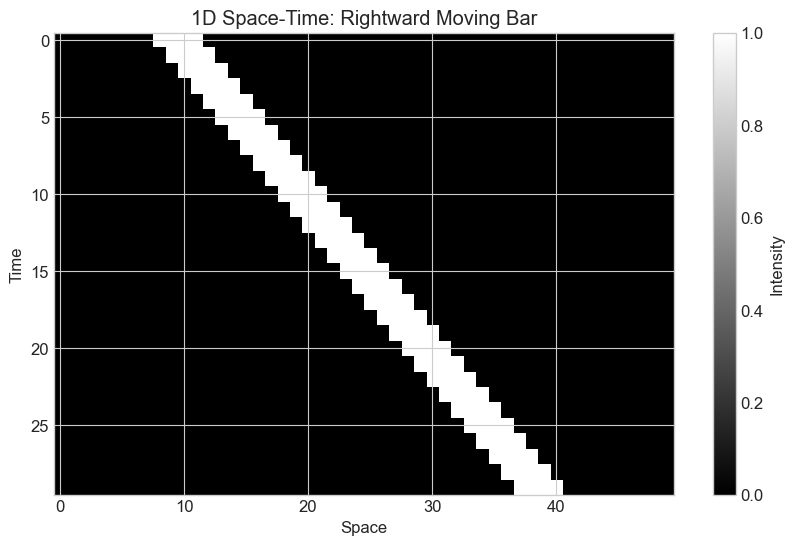

In [110]:
def create_1d_moving_bar(space_size, time_size, bar_width, speed, direction=1):
    """
    Create a 1D bar moving over time.

    Parameters:
    -----------
    space_size : int
        Size of the spatial dimension
    time_size : int
        Number of time frames
    bar_width : int
        Width of the bar in pixels
    speed : float
        Speed of the bar in pixels per frame
    direction : int
        Direction of motion (1 for rightward, -1 for leftward)

    Returns:
    --------
    stimulus : ndarray
        2D array with dimensions (time_size, space_size)
    """
    stimulus = np.zeros((time_size, space_size))

    for t in range(time_size):
        center = int((space_size / 2) + direction * speed * (t - time_size / 2))
        start = max(0, center - bar_width // 2)
        end = min(space_size, center + bar_width // 2)
        if start < space_size and end > 0:
            stimulus[t, start:end] = 1.0

    return stimulus


# Create a simple rightward moving bar
space_size = 50
time_size = 30
bar_width = 5
speed = 1
direction = 1  # rightward

stimulus_right = create_1d_moving_bar(
    space_size, time_size, bar_width, speed, direction
)

# Visualize the stimulus
plt.figure(figsize=(10, 6))
plt.imshow(stimulus_right, cmap="gray", aspect="auto", origin="upper")
plt.title(f"1D Space-Time: {'Rightward' if direction == 1 else 'Leftward'} Moving Bar")
plt.xlabel("Space")
plt.ylabel("Time")
plt.colorbar(label="Intensity")
plt.show()

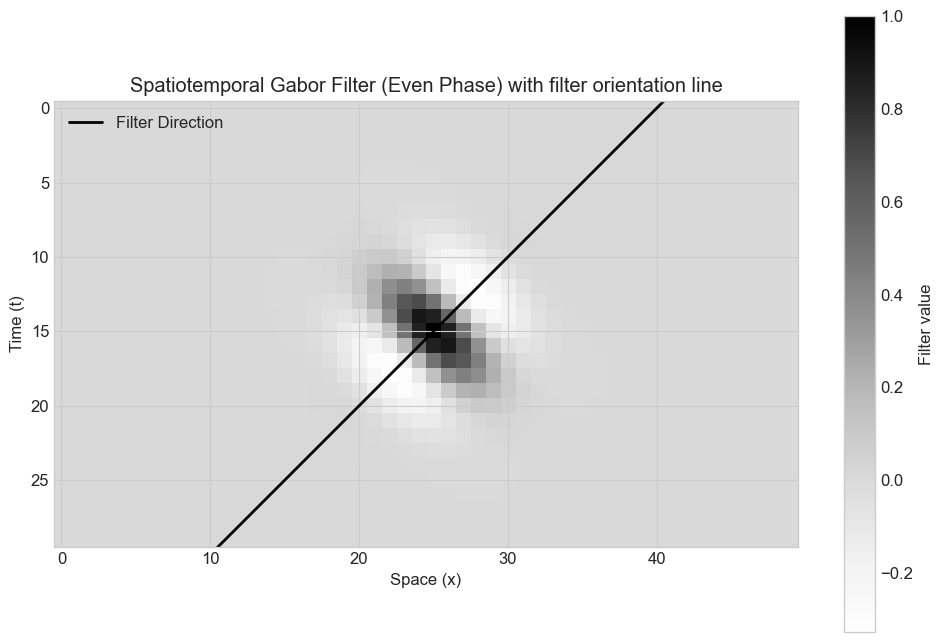

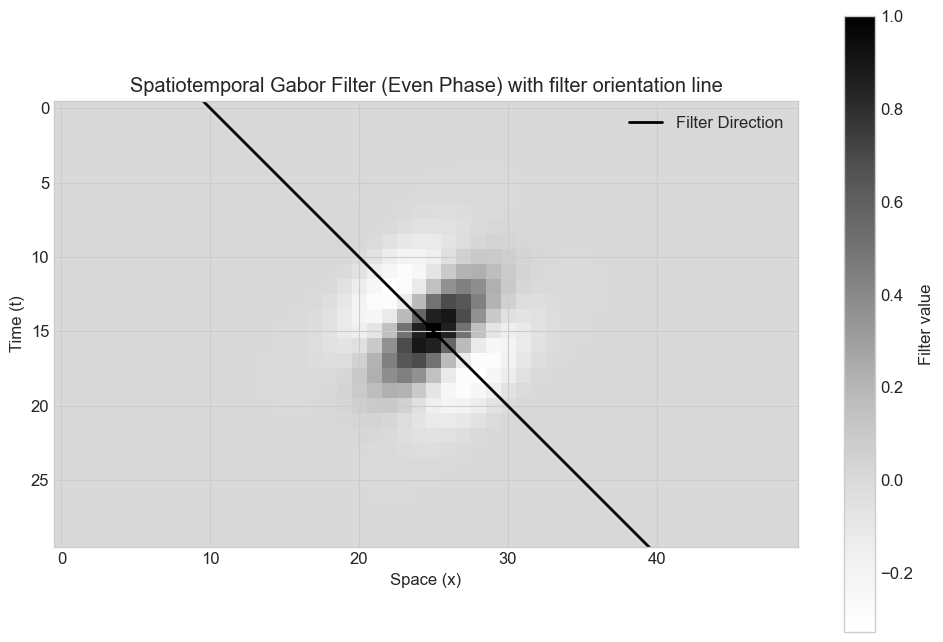

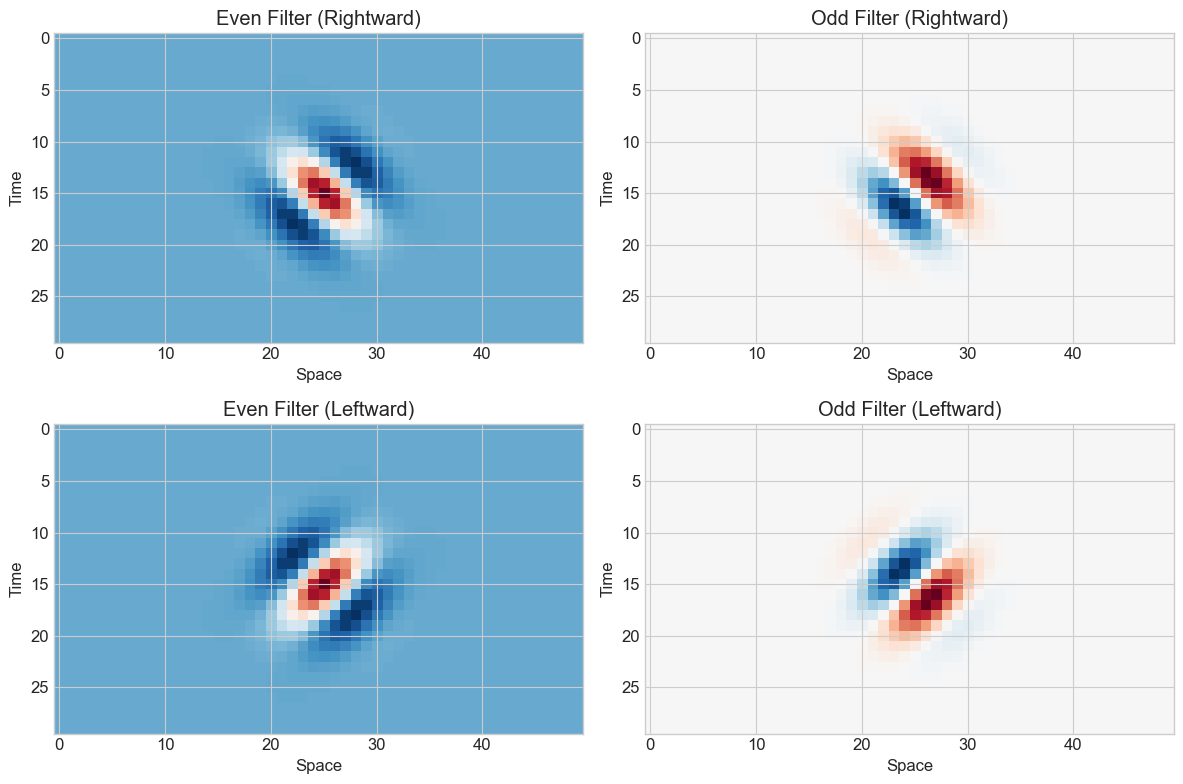

In [112]:
# Create filters for rightward motion
even_filter_right, odd_filter_right = create_1d_spatiotemporal_filters(
    space_size, time_size, speed, direction=1, f=0.1
)

# Create filters for leftward motion
even_filter_left, odd_filter_left = create_1d_spatiotemporal_filters(
    space_size, time_size, speed, direction=-1, f=0.1
)

# Visualize the filters
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].imshow(even_filter_right, cmap="RdBu_r", aspect="auto", origin="upper")
axs[0, 0].set_title("Even Filter (Rightward)")
axs[0, 0].set_xlabel("Space")
axs[0, 0].set_ylabel("Time")

axs[0, 1].imshow(odd_filter_right, cmap="RdBu_r", aspect="auto", origin="upper")
axs[0, 1].set_title("Odd Filter (Rightward)")
axs[0, 1].set_xlabel("Space")
axs[0, 1].set_ylabel("Time")

axs[1, 0].imshow(even_filter_left, cmap="RdBu_r", aspect="auto", origin="upper")
axs[1, 0].set_title("Even Filter (Leftward)")
axs[1, 0].set_xlabel("Space")
axs[1, 0].set_ylabel("Time")

axs[1, 1].imshow(odd_filter_left, cmap="RdBu_r", aspect="auto", origin="upper")
axs[1, 1].set_title("Odd Filter (Leftward)")
axs[1, 1].set_xlabel("Space")
axs[1, 1].set_ylabel("Time")

plt.tight_layout()
plt.show()

In [115]:
# TODO: Now test your energy model on stimuli moving in both directions
# (rightward and leftward) and with filters tuned to both directions.
# Calculate and compare the energy responses for each combination.

# Create leftward moving stimulus
stimulus_left = create_1d_moving_bar(
    space_size, time_size, bar_width, speed, direction=-1
)

energy_right = apply_energy_model(stimulus_left, even_filter_right, odd_filter_right)

energy_left = apply_energy_model(stimulus_left, even_filter_left, odd_filter_left)

# Apply your energy model to each combination of stimulus and filter
# Calculate energy responses
print(energy_right, energy_left)

# Visualize the results

4462.904815957256 71210.20958393108


### 2.3 Direction Selectivity

The motion energy model should respond more strongly to motion in its preferred direction. Let's explore this direction selectivity.

In [18]:
def compute_direction_selectivity(stimulus, preferred_speed, angles):
    """
    Compute directional tuning curve for a given stimulus.

    Parameters:
    -----------
    stimulus : ndarray
        2D array with dimensions (time, space) representing the stimulus
    preferred_speed : float
        Preferred speed for the filters
    angles : array-like
        Array of angles (in degrees) to test

    Returns:
    --------
    responses : ndarray
        Array of energy responses for each angle
    """
    # TODO: Implement a function that computes the response of energy models
    # tuned to different directions (specified by angles) for a given stimulus.
    #
    # TUTORIAL:
    # For a 1D space + time stimulus, angles of 0° and 180° represent rightward and leftward motion.
    # For each angle:
    # 1. Convert the angle to a direction vector:
    #    - direction = np.cos(angle_radians)  # 1 for rightward (0°), -1 for leftward (180°)
    #
    # 2. Create filters tuned to that direction:
    #    - even_filter, odd_filter = create_1d_spatiotemporal_filters(
    #        space_size, time_size, preferred_speed, direction)
    #
    # 3. Apply the energy model to get a response:
    #    - energy = apply_energy_model(stimulus, even_filter, odd_filter)
    #
    # 4. Store the response for each angle:
    #    - responses[i] = energy
    #
    # Note: For a comprehensive directional tuning curve, test angles spanning the full 360°,
    # even though in 1D+time we're primarily interested in 0° (right) and 180° (left).
    # This prepares us for 2D+time in later exercises.

    # Your implementation here:

    # Placeholder return value (replace with your calculations)
    responses = np.zeros(len(angles))

    return responses

In [19]:
# TODO: Use your compute_direction_selectivity function to generate
# tuning curves for rightward and leftward moving stimuli.
# Plot the results on polar coordinates to visualize the directional tuning.

# Define angles to test
angles = np.linspace(0, 360, 16, endpoint=False)

# Compute direction selectivity

# Plot the results

## Exercise 3: Motion Energy Parameters

In this exercise, you'll explore how different parameters affect motion energy models. You'll implement a simple interface to visualize these effects.

In [20]:
from ipywidgets import FloatSlider, IntSlider, interact


def explore_filter_parameters(
    spatial_freq=0.1, temporal_freq=0.1, direction=0, sigma_space=10, sigma_time=10
):
    """
    Visualize spatiotemporal filters with adjustable parameters.

    Parameters:
    -----------
    spatial_freq : float
        Spatial frequency of the filter
    temporal_freq : float
        Temporal frequency of the filter
    direction : float
        Direction of motion (in degrees)
    sigma_space : float
        Spatial spread of the Gaussian envelope
    sigma_time : float
        Temporal spread of the Gaussian envelope
    """
    # TODO: Implement a function that creates and visualizes spatiotemporal
    # filters with the specified parameters. The visualization should include:
    # - The even and odd filters
    # - How they respond to example stimuli
    # - Motion energy calculations

    # Your implementation here:

    # Placeholder visualization
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].text(0.5, 0.5, "Even Filter\nwould be shown here", ha="center", va="center")
    axs[0].set_title("Even Filter")
    axs[0].set_xlim(0, 1)
    axs[0].set_ylim(0, 1)

    axs[1].text(0.5, 0.5, "Odd Filter\nwould be shown here", ha="center", va="center")
    axs[1].set_title("Odd Filter")
    axs[1].set_xlim(0, 1)
    axs[1].set_ylim(0, 1)

    plt.suptitle(
        f"Spatiotemporal Filters (SF={spatial_freq}, TF={temporal_freq}, Dir={direction}°)"
    )
    plt.tight_layout()
    plt.show()


# Create an interactive widget to explore filter parameters
interact(
    explore_filter_parameters,
    spatial_freq=FloatSlider(
        min=0.01, max=0.5, step=0.01, value=0.1, description="Spatial Freq:"
    ),
    temporal_freq=FloatSlider(
        min=0.01, max=0.5, step=0.01, value=0.1, description="Temporal Freq:"
    ),
    direction=FloatSlider(
        min=0, max=360, step=15, value=0, description="Direction (°):"
    ),
    sigma_space=IntSlider(min=1, max=20, value=10, description="Spatial σ:"),
    sigma_time=IntSlider(min=1, max=20, value=10, description="Temporal σ:"),
);

interactive(children=(FloatSlider(value=0.1, description='Spatial Freq:', max=0.5, min=0.01, step=0.01), Float…

**Questions:**

1. How does changing the spatial frequency affect the filter's selectivity for different speeds?
2. How does changing the temporal frequency affect the filter's selectivity for different speeds?
3. What is the relationship between spatial frequency, temporal frequency, and preferred speed?
4. How do the sigma parameters affect the filter's selectivity?

**Your answers here:**
1. 
2. 
3. 
4. 

## Summary

In these exercises, you've explored the fundamental concepts of motion energy models:

1. You've analyzed and created space-time representations of motion, which are central to understanding how motion can be detected from a sequence of static images.

2. You've implemented components of a basic motion energy model, including spatiotemporal filters and the energy calculation, and explored how these components work together to detect motion.

3. You've investigated how different parameters affect the behavior of motion energy models, building intuition for how these models can be tuned to detect different types of motion.

In the next section, we'll explore visual stimuli in more detail, which will allow us to create and manipulate more complex motion patterns.